# Perceptron

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7],'grumpy_proportion':[0.3,0.2,0.3,0.9],'prediction':['kitten','kitten','kitten','adult']})
df.head()


,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.3,kitten
1,0.4,0.2,kitten
2,0.5,0.3,kitten
3,0.7,0.9,adult


In [3]:
kittens=df[df['prediction']=='kitten']
adults=df[df['prediction']=='adult']
print(kittens)
print(adults)

   sleep_proportion  grumpy_proportion prediction
0               0.2                0.3     kitten
1               0.4                0.2     kitten
2               0.5                0.3     kitten
   sleep_proportion  grumpy_proportion prediction
3               0.7                0.9      adult


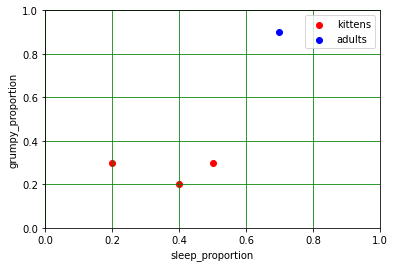

In [4]:
plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color='r',label='kittens')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],label='adults',color='b')
plt.axis([0,1,0,1])
plt.xlabel('sleep_proportion')
plt.ylabel('grumpy_proportion')
plt.grid(color='g')
plt.legend()

In [5]:
df['bprediction']=df['prediction'].apply(lambda x: x=='kitten')
df

,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.3,kitten,True
1,0.4,0.2,kitten,True
2,0.5,0.3,kitten,True
3,0.7,0.9,adult,False


In [6]:
from sklearn.linear_model import Perceptron

classifier=Perceptron(max_iter=1000)
cmodel=classifier.fit(df[['sleep_proportion','grumpy_proportion']],df['bprediction'])
cmodel.predict([[0.3,0.5],[0.7,0.9]])


array([ True, False])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


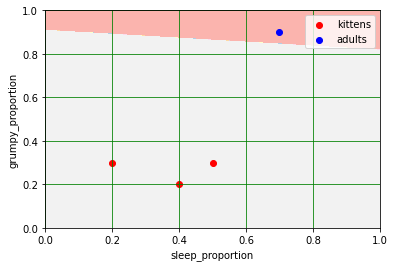

In [7]:
import numpy as np 



x_min,x_max=0,1
y_min,y_max=0,1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.001),np.arange(y_min,y_max,0.001))

# print(xx)
# print(yy)
xx_lin=xx.ravel()
yy_lin=yy.ravel()
# print(xx,'\n',yy)
ip=np.c_[xx_lin,yy_lin]
# print(ip)
z=cmodel.predict(ip)
z=z.reshape(xx.shape)
print(z)
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)


plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color='r',label='kittens')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],label='adults',color='b')
plt.axis([0,1,0,1])
plt.xlabel('sleep_proportion')
plt.ylabel('grumpy_proportion')
plt.grid(color='g')
plt.legend()
# print(z)

In [8]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
actual=df['bprediction']
pred=cmodel.predict(df[['sleep_proportion','grumpy_proportion']])
confusion_matrix(actual,pred)

array([[1, 0],
       [0, 3]], dtype=int64)

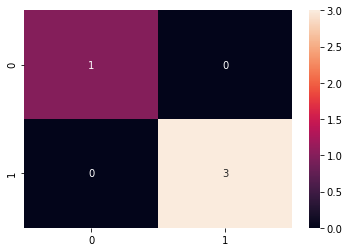

In [9]:
import seaborn as sb
from sklearn import metrics
sb.heatmap(metrics.confusion_matrix(actual,pred),annot=True)

In [10]:
from sklearn.metrics import classification_report
actual=df['bprediction']
pred=cmodel.predict(df[['sleep_proportion','grumpy_proportion']])
print(classification_report(actual,pred,target_names=['cat','dog']))

              precision    recall  f1-score   support

         cat       1.00      1.00      1.00         1
         dog       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



# Confussion Matrix
 In this type of matrix we have rows as predicted vaules of output. In columns are actual values of output.
 
 This matrix has two rows and two columns.  

# SVM: Support Vector Machine

multiclass 

svm has the classifications svc and svr



it has itterations

svm draw three types of fits  
    linear  
    poly  
    rbg  
kernal train  


In [11]:
from sklearn.metrics import classification_report
actual=['dog','cat','dog','dog','cat']
pred=['dog','dog','dog','cat','cat']
print(classification_report(actual,pred,target_names=['cat','dog']))

              precision    recall  f1-score   support

         cat       0.50      0.50      0.50         2
         dog       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



precision=TP/TP+FP(CAT)      TN/(TN+FN) (DOG)  
 RECAL=TP/TP+FN(CAT)    TN/TN+FP(DOG)  
 F1 SCORE: 2*(precision*recal/precision+recal)  

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


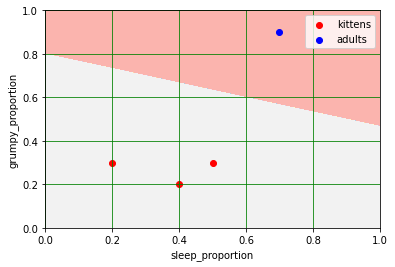

In [12]:
from sklearn.svm import SVC
SVCClassifier=SVC(kernel='linear',C=100,max_iter=3)
SVCmodel=SVCClassifier.fit(df[['sleep_proportion','grumpy_proportion']],df['bprediction'])



import numpy as np 



x_min,x_max=0,1
y_min,y_max=0,1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.001),np.arange(y_min,y_max,0.001))

# print(xx)
# print(yy)
xx_lin=xx.ravel()
yy_lin=yy.ravel()
# print(xx,'\n',yy)
ip=np.c_[xx_lin,yy_lin]
# print(ip)
z=SVCmodel.predict(ip)
z=z.reshape(xx.shape)
# print(z)
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)


plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color='r',label='kittens')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],label='adults',color='b')
plt.axis([0,1,0,1])
plt.xlabel('sleep_proportion')
plt.ylabel('grumpy_proportion')
plt.grid(color='g')
plt.legend()
print(z)

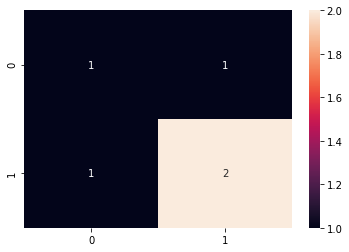

In [13]:
import seaborn as sb
from sklearn import metrics
sb.heatmap(metrics.confusion_matrix(actual,pred),annot=True)